In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("IPL Matches Dataset.csv")

In [6]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
data=df[["id","season","team1","team2","toss_winner","toss_decision","winner","venue"]]

In [8]:
data.head()

,id,season,team1,team2,toss_winner,toss_decision,winner,venue
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,Maharashtra Cricket Association Stadium
2,3,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,4,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,Holkar Cricket Stadium
4,5,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             636 non-null    int64 
 1   season         636 non-null    int64 
 2   team1          636 non-null    object
 3   team2          636 non-null    object
 4   toss_winner    636 non-null    object
 5   toss_decision  636 non-null    object
 6   winner         633 non-null    object
 7   venue          636 non-null    object
dtypes: int64(2), object(6)
memory usage: 39.9+ KB


In [12]:
data["toss_win_match_win"]=data["toss_winner"]==data["winner"]
data["toss_win_match_win"].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_2600\2999839031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["toss_win_match_win"]=data["toss_winner"]==data["winner"]


toss_win_match_win
True     325
False    311
Name: count, dtype: int64

In [14]:
venue_win=data.groupby(["venue","winner"]).size().unstack().fillna(0)
lucky_venue=venue_win.stack().idxmax()

In [16]:
lucky_venue

('Eden Gardens', 'Kolkata Knight Riders')

In [26]:
top10wins_venue=venue_win.stack().sort_values(ascending=False).head(10)
top10wins_venue

venue                                       winner                     
Eden Gardens                                Kolkata Knight Riders          37.0
Wankhede Stadium                            Mumbai Indians                 34.0
MA Chidambaram Stadium, Chepauk             Chennai Super Kings            33.0
M Chinnaswamy Stadium                       Royal Challengers Bangalore    30.0
Sawai Mansingh Stadium                      Rajasthan Royals               24.0
Feroz Shah Kotla                            Delhi Daredevils               23.0
Rajiv Gandhi International Stadium, Uppal   Sunrisers Hyderabad            20.0
Punjab Cricket Association Stadium, Mohali  Kings XI Punjab                18.0
Eden Gardens                                Mumbai Indians                  9.0
M Chinnaswamy Stadium                       Mumbai Indians                  8.0
dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_2600\2183388736.py:7: UserWarning: Glyph 127967 (\N{STADIUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127967 (\N{STADIUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


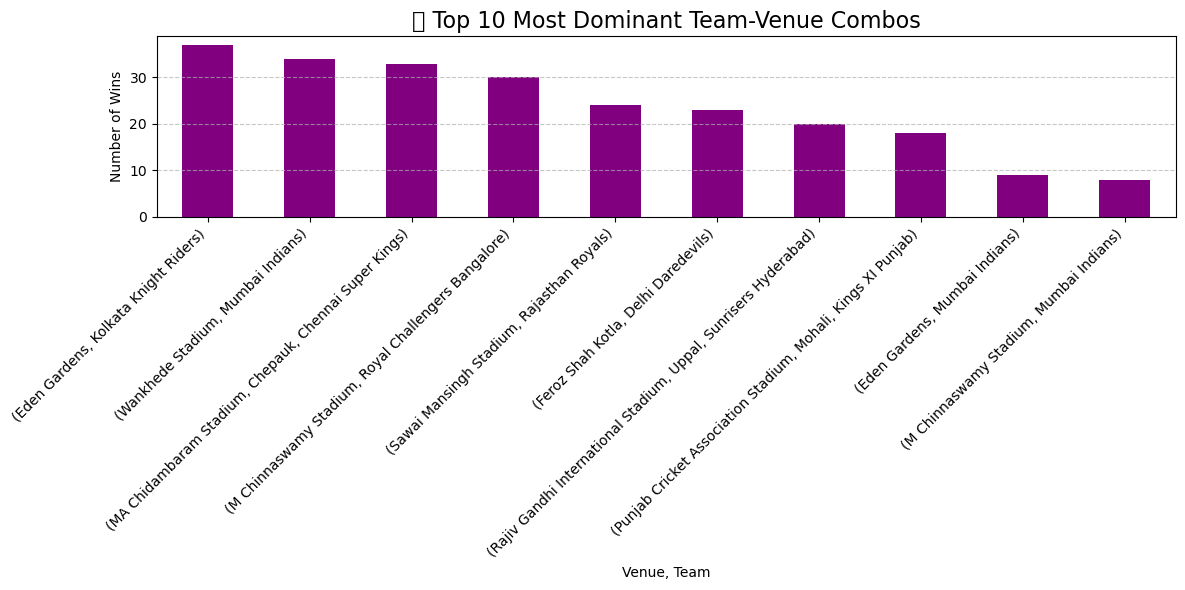

In [28]:
plt.figure(figsize=(12,6))
top10wins_venue.plot(kind='bar', color='purple')
plt.title("🏟️ Top 10 Most Dominant Team-Venue Combos", fontsize=16)
plt.ylabel("Number of Wins")
plt.xlabel("Venue, Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
venue_toss_winner = data.groupby(["venue", "toss_decision", "winner"]).size().reset_index(name='wins')

C:\Users\hp\AppData\Local\Temp\ipykernel_2600\1316855062.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=venue_toss_winner, x='venue', y='wins', hue='toss_decision',ci=None)
C:\Users\hp\AppData\Local\Temp\ipykernel_2600\1316855062.py:8: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


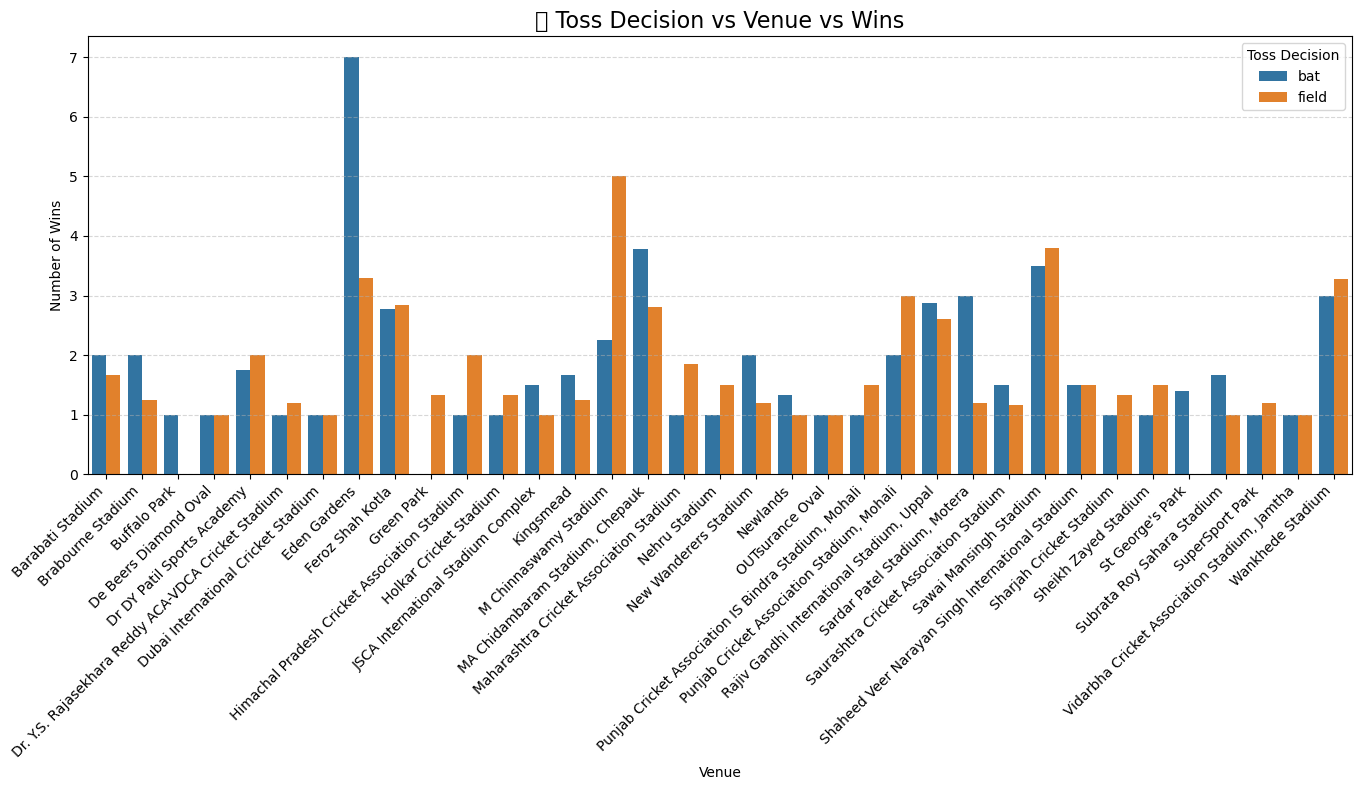

In [30]:
plt.figure(figsize=(14,8))
sns.barplot(data=venue_toss_winner, x='venue', y='wins', hue='toss_decision',ci=None)
plt.title("🏏 Toss Decision vs Venue vs Wins", fontsize=16)
plt.ylabel("Number of Wins")
plt.xlabel("Venue")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Toss Decision")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [31]:
# Top winner per season
top_per_season = data.groupby(['season', 'winner']).size().reset_index(name='wins')
top_winner = top_per_season.loc[top_per_season.groupby('season')['wins'].idxmax()]

print(top_winner)


    season                 winner  wins
6     2008       Rajasthan Royals    13
10    2009       Delhi Daredevils    10
21    2010         Mumbai Indians    11
24    2011    Chennai Super Kings    11
38    2012  Kolkata Knight Riders    12
47    2013         Mumbai Indians    13
54    2014        Kings XI Punjab    12
60    2015    Chennai Super Kings    10
75    2016    Sunrisers Hyderabad    11
80    2017         Mumbai Indians    12
